<a href="https://colab.research.google.com/github/Sujoy-004/spotify_streaming_analysis/blob/main/spotify_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### imports

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.0 MB/s eta 0:00:00


### load dataset from GitHub

In [71]:
url = "https://raw.githubusercontent.com/Sujoy-004/spotify_streaming_analysis/main/Most_Streamed_Spotify_Songs_2024.csv"
df = pd.read_csv(url, encoding='latin-1')

#preview
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [72]:
# Check for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nDuplicate rows before cleaning:")
print(df.duplicated().sum())

# Depending on the findings, we can decide on strategies for handling missing values and duplicates.

Missing values before cleaning:
Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
TIDAL Popularity       

In [73]:
# Drop the 'TIDAL Popularity' column due to a large number of missing values
df = df.drop('TIDAL Popularity', axis=1)

# Remove duplicate rows
df = df.drop_duplicates()

# Verify the changes
print("Missing values after dropping column and duplicates:")
print(df.isnull().sum())
print("\nDuplicate rows after dropping duplicates:")
print(df.duplicated().sum())

Missing values after dropping column and duplicates:
Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3332
Shazam Counts                  577
Ex

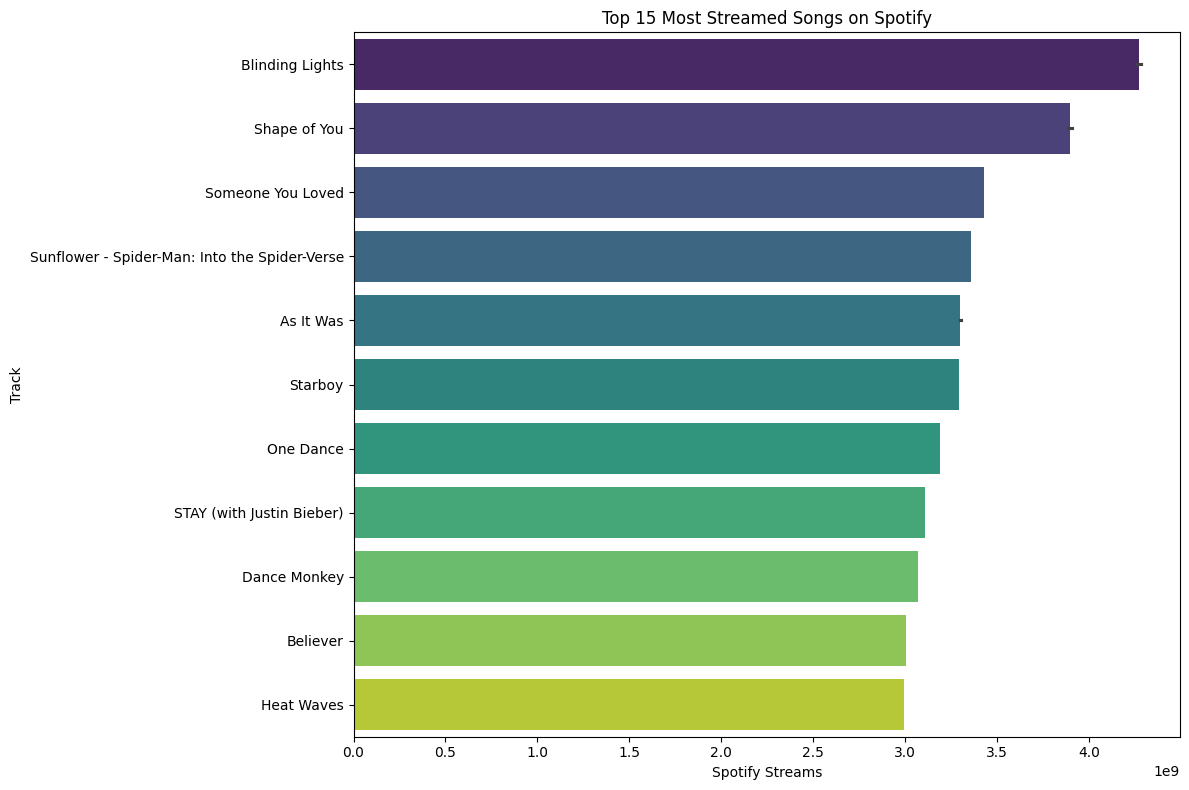

In [77]:
# Sort by Spotify Streams and get the top 15
top_15_songs = df.sort_values(by='Spotify Streams', ascending=False).head(15)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Spotify Streams', y='Track', data=top_15_songs, palette='viridis', hue='Track', legend=False)
plt.title('Top 15 Most Streamed Songs on Spotify')
plt.xlabel('Spotify Streams')
plt.ylabel('Track')
plt.tight_layout()
plt.show()

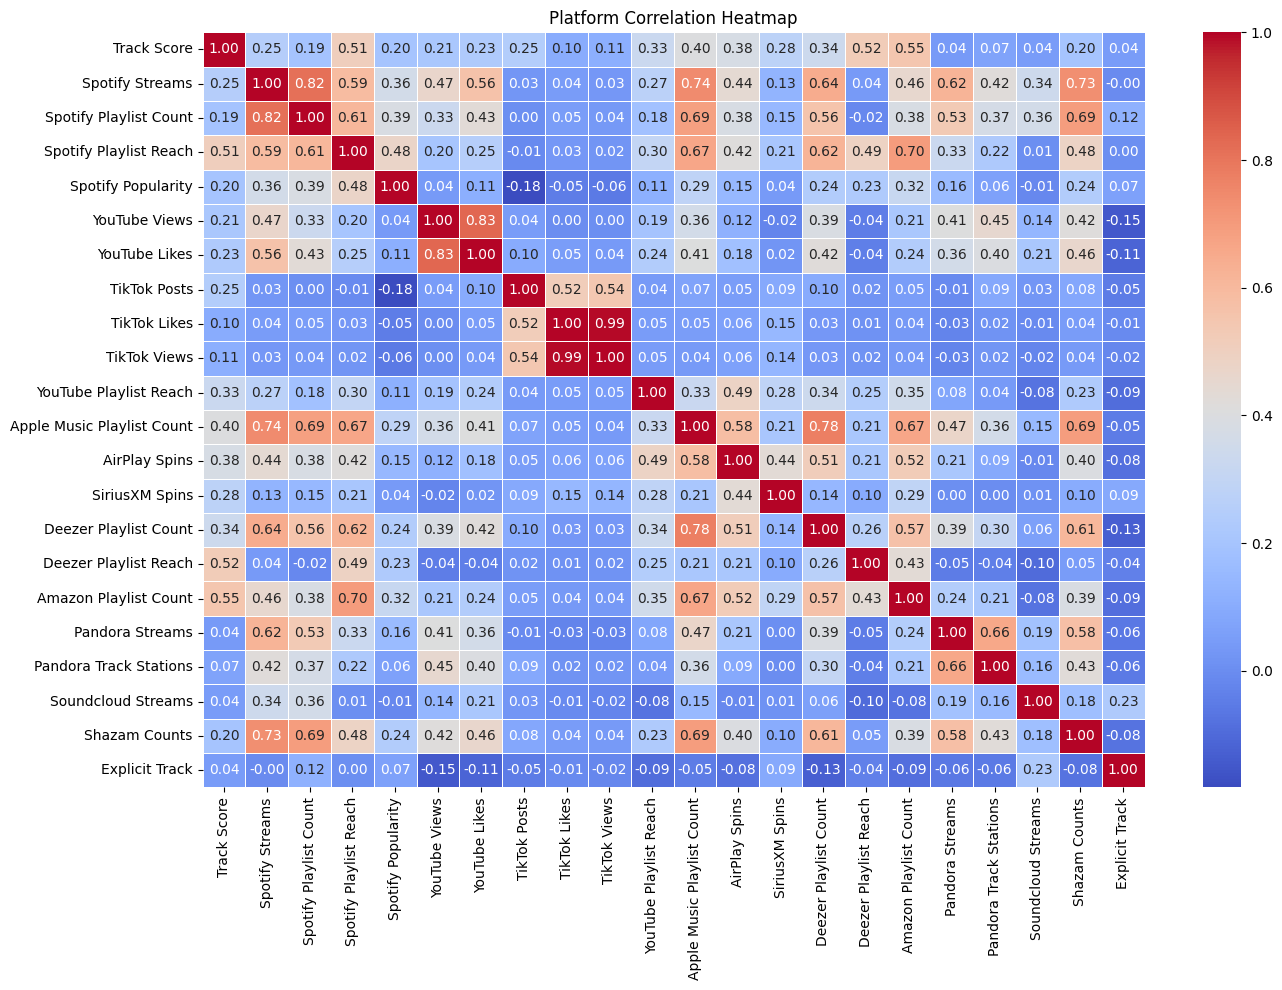

In [79]:
# Select relevant platform-related columns for correlation analysis
platform_cols = [
    'Track Score', 'Spotify Streams', 'Spotify Playlist Count',
    'Spotify Playlist Reach', 'Spotify Popularity', 'YouTube Views',
    'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views',
    'YouTube Playlist Reach', 'Apple Music Playlist Count', 'AirPlay Spins',
    'SiriusXM Spins', 'Deezer Playlist Count', 'Deezer Playlist Reach',
    'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
    'Soundcloud Streams', 'Shazam Counts', 'Explicit Track'
]

# Convert relevant columns to numeric, coercing errors to NaN
for col in ['Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach',
            'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes',
            'TikTok Views', 'YouTube Playlist Reach', 'Apple Music Playlist Count',
            'AirPlay Spins', 'SiriusXM Spins', 'Deezer Playlist Count',
            'Deezer Playlist Reach', 'Amazon Playlist Count', 'Pandora Streams',
            'Pandora Track Stations', 'Soundcloud Streams', 'Shazam Counts']:
    if col in df.columns:
        # Check if the column is of object type before attempting string operations
        if df[col].dtype == 'object':
            df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '').str.replace('M', 'e6'), errors='coerce')
        else:
             df[col] = pd.to_numeric(df[col], errors='coerce')


# Select only the columns that exist in the dataframe
existing_platform_cols = [col for col in platform_cols if col in df.columns]
platform_df = df[existing_platform_cols]

# Calculate the correlation matrix
correlation_matrix = platform_df.corr()

# Create the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Platform Correlation Heatmap')
plt.tight_layout()
plt.show()

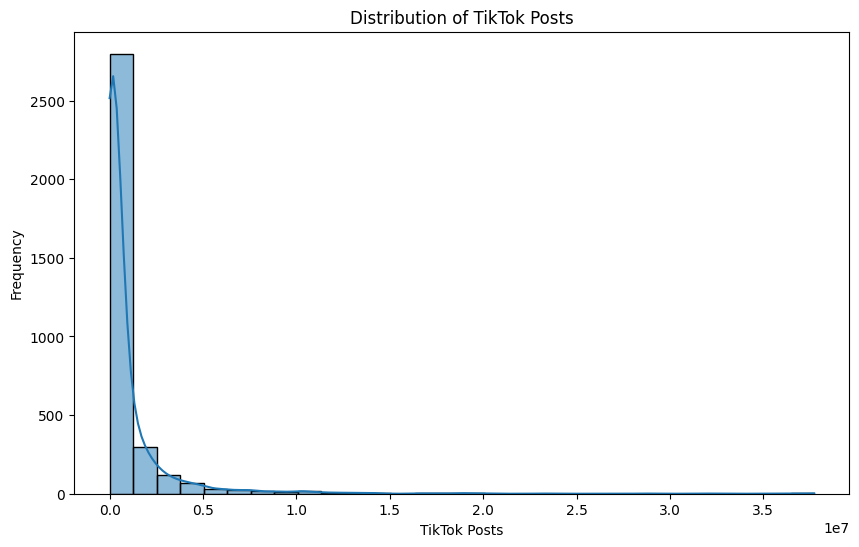

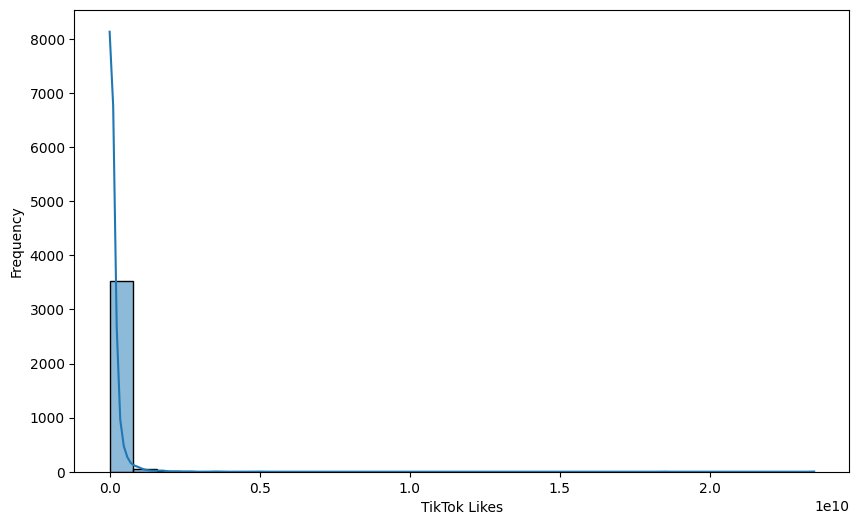

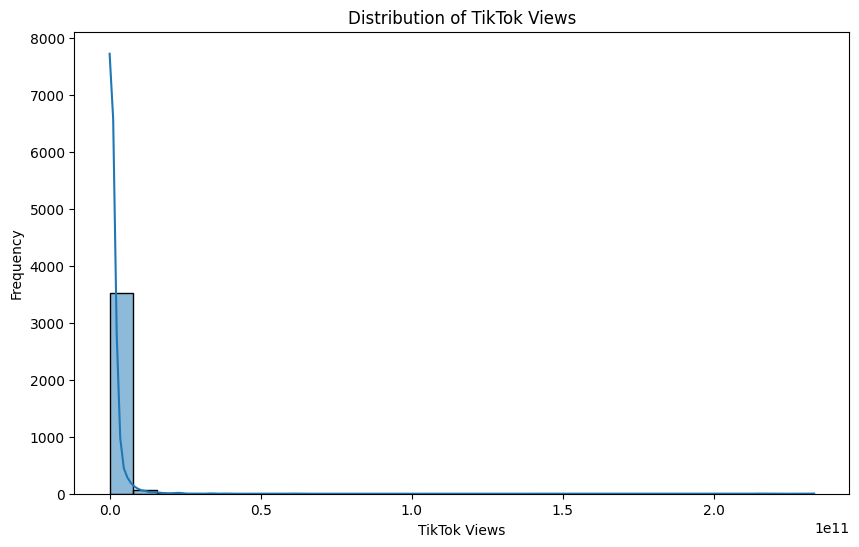

In [114]:
# Convert TikTok columns to numeric, coercing errors to NaN
tiktok_cols = ['TikTok Posts', 'TikTok Likes', 'TikTok Views']
for col in tiktok_cols:
    if col in df.columns:
        # Ensure the column is treated as string before replacing
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '').str.replace('M', 'e6'), errors='coerce')

# Visualize the distribution of TikTok Posts
plt.figure(figsize=(10, 6))
sns.histplot(df['TikTok Posts'].dropna(), bins=30,  kde = True)
plt.title('Distribution of TikTok Posts')
plt.xlabel('TikTok Posts')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of TikTok Likes
plt.figure(figsize=(10, 6))
sns.histplot(df['TikTok Likes'].dropna(), bins=30,  kde = True)
plt.xlabel('TikTok Likes')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of TikTok Views
plt.figure(figsize=(10, 6))
sns.histplot(df['TikTok Views'].dropna(), bins=30, kde = True)
plt.title('Distribution of TikTok Views')
plt.xlabel('TikTok Views')
plt.ylabel('Frequency')
plt.show()

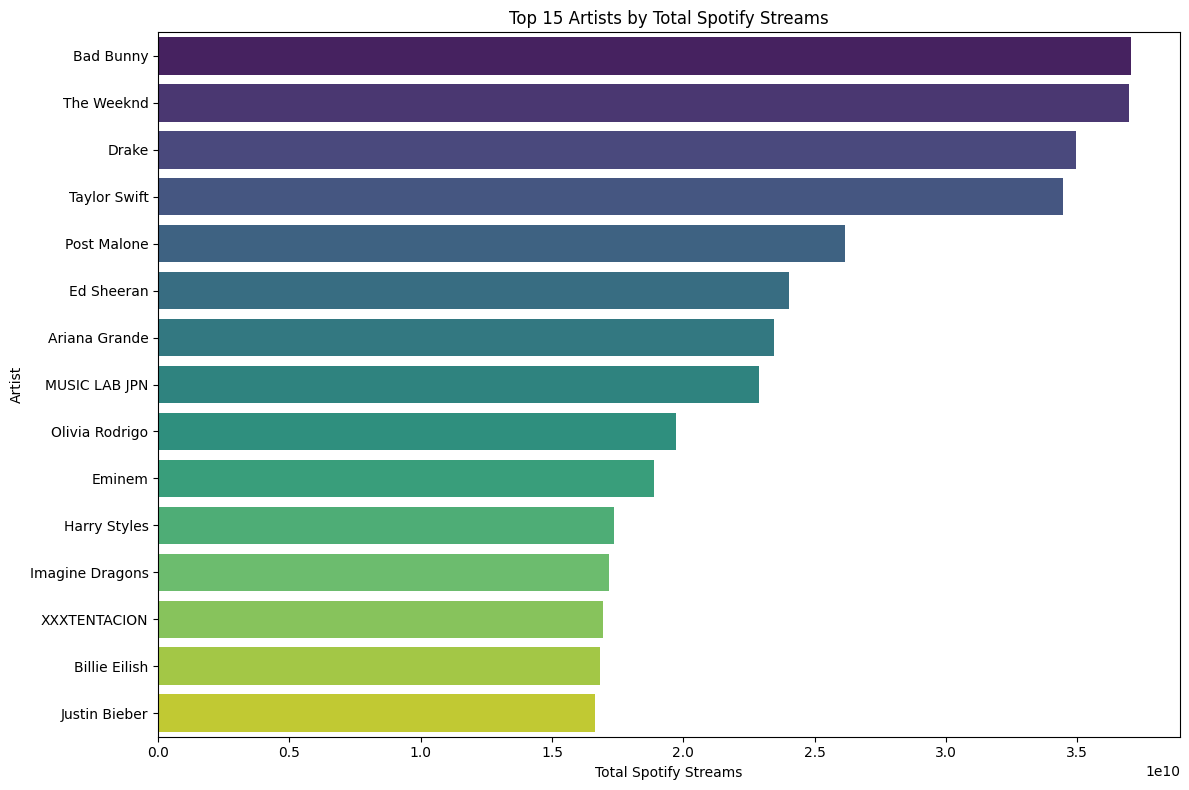

In [91]:
# Calculate total streams per artist
artist_streams = df.groupby('Artist')['Spotify Streams'].sum().reset_index()

# Sort by total streams and get the top artists (e.g., top 15)
top_artists_by_streams = artist_streams.sort_values(by='Spotify Streams', ascending=False).head(15)

# Create a bar plot of top artists by total streams
plt.figure(figsize=(12, 8))
sns.barplot(x='Spotify Streams', y='Artist', data=top_artists_by_streams, palette='viridis', hue='Artist', legend=False)
plt.title('Top 15 Artists by Total Spotify Streams')
plt.xlabel('Total Spotify Streams')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

In [100]:
# Select features for modeling
feature_cols = [
    'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Views',
    'Spotify Playlist Count', 'Apple Music Playlist Count',
    'Shazam Counts', 'All Time Rank'
]

# Filter available features
available_features = [col for col in feature_cols if col in df.columns]
print(f"Using features: {available_features}")

# Prepare data
X = df[available_features].copy()
y = df['Spotify Streams'].copy()

# Convert 'All Time Rank' to numeric, coercing errors to NaN
if 'All Time Rank' in X.columns:
    X['All Time Rank'] = pd.to_numeric(X['All Time Rank'].astype(str).str.replace(',', ''), errors='coerce')

# Replace spaces in column names with underscores to avoid LightGBM warning
X.columns = X.columns.str.replace(' ', '_')


# Remove missing values in the target variable
mask = ~y.isnull()
X = X[mask]
y = y[mask]

# Impute missing values in features with the median
X = X.fillna(X.median())

print(f"Final dataset shape: {X.shape}")

Using features: ['YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Views', 'Spotify Playlist Count', 'Apple Music Playlist Count', 'Shazam Counts', 'All Time Rank']
Final dataset shape: (4485, 8)


In [115]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42),
    'LightGBM': lgb.LGBMRegressor(random_state=42, force_col_wise=True), # Added force_col_wise=True
    'CatBoost': cb.CatBoostRegressor(random_state=42, verbose=0),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor()
}

# Train and evaluate models
results = {}
print("Model Performance Comparison:")
print("-" * 60)

for name, model in models.items():
    # Train model
    if name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'SVR', 'KNN']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2, 'model': model}
    print(f"{name:20s} | R²: {r2:6.3f} | RMSE: {rmse:12,.0f}")

# Find best model
best_model_name = max(results.keys(), key=lambda x: results[x]['R2'])
print(f"\nBest Model: {best_model_name} (R² = {results[best_model_name]['R2']:.3f})")

Model Performance Comparison:
------------------------------------------------------------
Linear Regression    | R²:  0.723 | RMSE:  282,067,700
Ridge Regression     | R²:  0.723 | RMSE:  282,069,159
Lasso Regression     | R²:  0.723 | RMSE:  282,067,700
Decision Tree        | R²:  0.599 | RMSE:  339,530,710
Random Forest        | R²:  0.785 | RMSE:  248,903,501
Gradient Boosting    | R²:  0.771 | RMSE:  256,500,201
XGBoost              | R²:  0.745 | RMSE:  271,098,454
[LightGBM] [Info] Total Bins 2039
[LightGBM] [Info] Number of data points in the train set: 3588, number of used features: 8
[LightGBM] [Info] Start training from score 449079617.996377
LightGBM             | R²:  0.784 | RMSE:  249,183,245
CatBoost             | R²:  0.787 | RMSE:  247,808,784
AdaBoost             | R²:  0.318 | RMSE:  442,912,081
SVR                  | R²: -0.139 | RMSE:  572,473,543
KNN                  | R²:  0.710 | RMSE:  288,743,606

Best Model: CatBoost (R² = 0.787)


In [116]:
# Create a DataFrame to summarize model performance
model_performance_summary = pd.DataFrame.from_dict(results, orient='index')

# Select and reorder columns for presentation
model_performance_summary = model_performance_summary[['MAE', 'RMSE', 'R2']]

# Format the numeric columns for better readability
for col in ['MAE', 'RMSE']:
    model_performance_summary[col] = model_performance_summary[col].map('{:,.0f}'.format)
model_performance_summary['R2'] = model_performance_summary['R2'].map('{:.3f}'.format)

# Sort by R² for easy comparison
model_performance_summary = model_performance_summary.sort_values(by='R2', ascending=False)


print("Model Performance Summary:")
display(model_performance_summary)

Model Performance Summary:


,MAE,RMSE,R2
CatBoost,"138,793,484","247,808,784",0.787
Random Forest,"136,030,732","248,903,501",0.785
LightGBM,"138,182,325","249,183,245",0.784
Gradient Boosting,"145,478,497","256,500,201",0.771
XGBoost,"151,386,206","271,098,454",0.745
Linear Regression,"156,784,530","282,067,700",0.723
Ridge Regression,"156,797,908","282,069,159",0.723
Lasso Regression,"156,784,531","282,067,700",0.723
KNN,"158,000,297","288,743,606",0.710
Decision Tree,"180,886,930","339,530,710",0.599


No charts were generated by quickchart


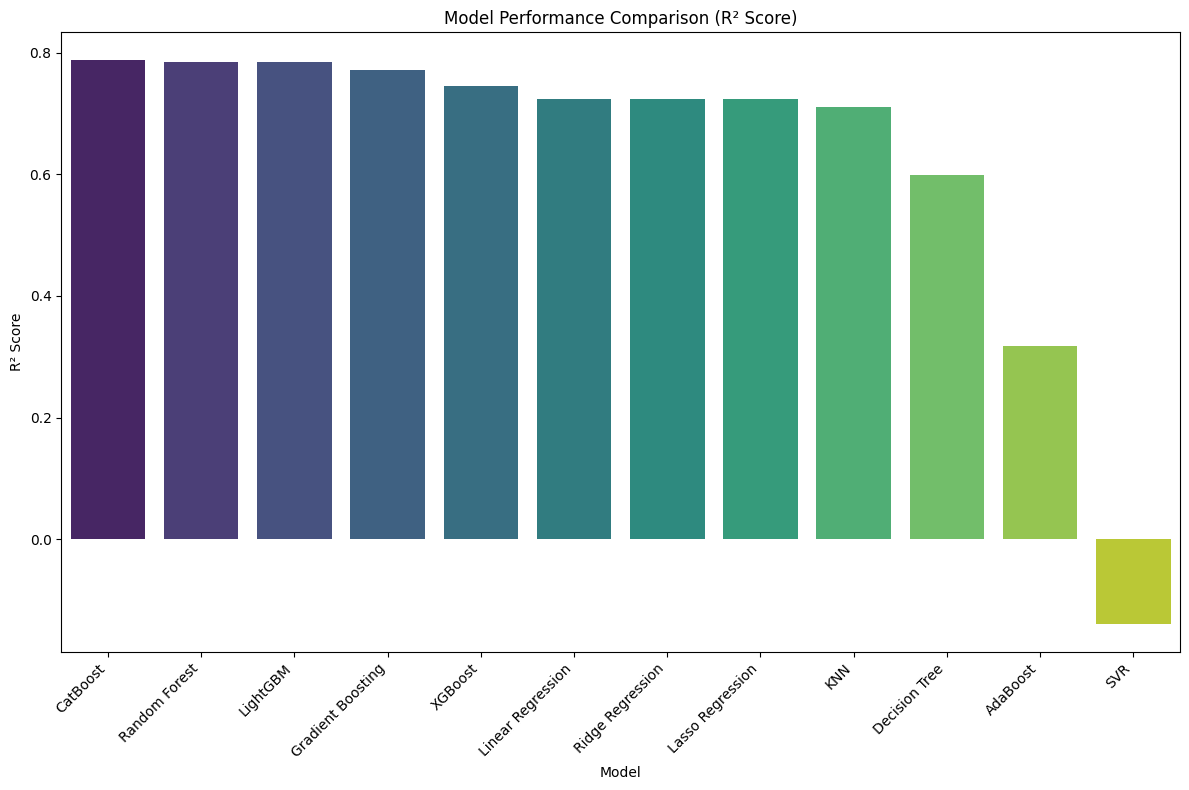

In [117]:
# Convert R2 column back to numeric for plotting
model_performance_summary['R2_numeric'] = pd.to_numeric(model_performance_summary['R2'])

# Create a bar plot of R² scores
plt.figure(figsize=(12, 8))
sns.barplot(x=model_performance_summary.index, y='R2_numeric', data=model_performance_summary, palette='viridis', hue=model_performance_summary.index, legend=False)
plt.title('Model Performance Comparison (R² Score)')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()

# Task
Generate visualizations for each trained regression model, displaying actual vs. predicted values.

## Generate predictions for each model

### Subtask:
Iterate through the trained models in the `results` dictionary and generate predictions on the test set (`X_test`) for each model.


**Reasoning**:
Iterate through the trained models and generate predictions on the test set, storing the predictions in the results dictionary.



In [120]:
# Iterate through the trained models and generate predictions
for name, model_info in results.items():
    model = model_info['model']

    # Use the correct test set based on whether the model was trained on scaled data
    if name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'SVR', 'KNN']:
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)

    # Store the predictions in the results dictionary
    results[name]['y_pred'] = y_pred

## Create visualization for each model

### Subtask:
For each model, create a scatter plot comparing the actual `y_test` values to the predicted `y_pred` values.


**Reasoning**:
Iterate through the results dictionary and create scatter plots for actual vs. predicted values for each model.



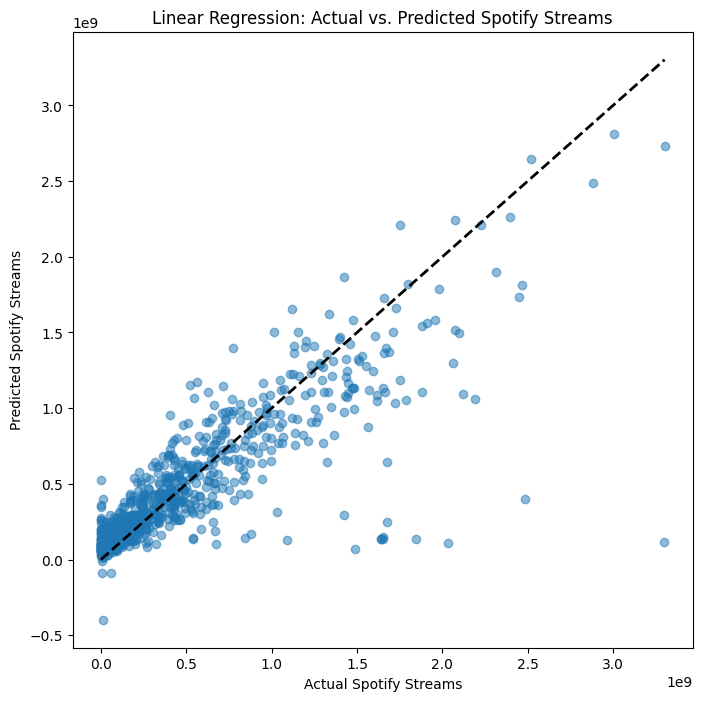

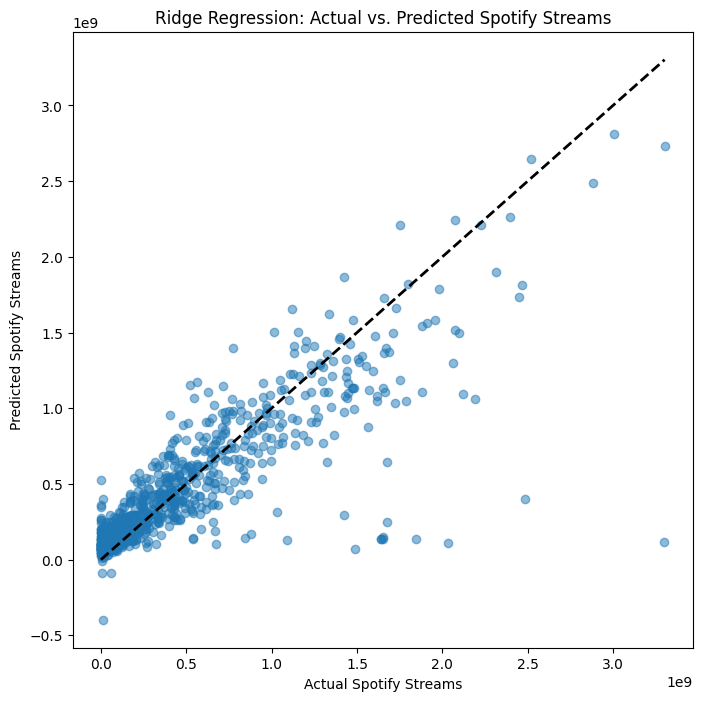

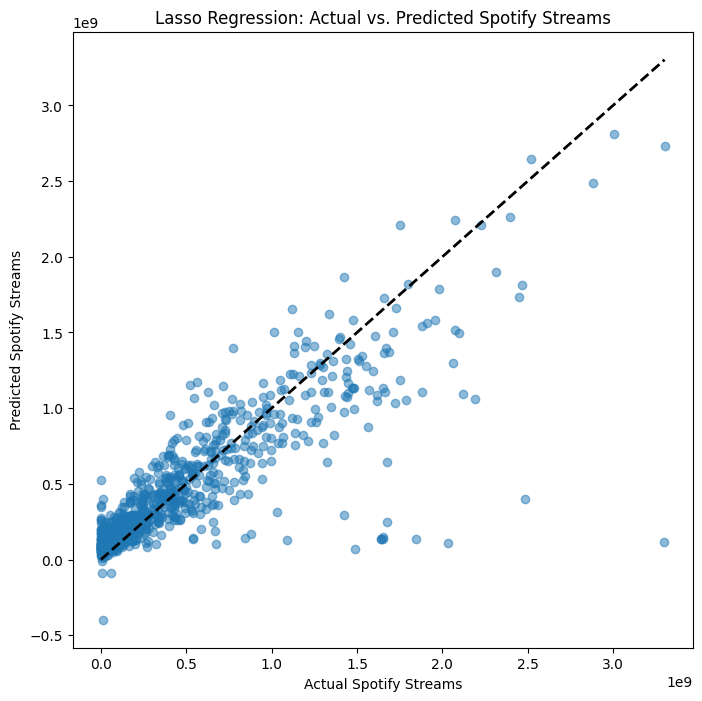

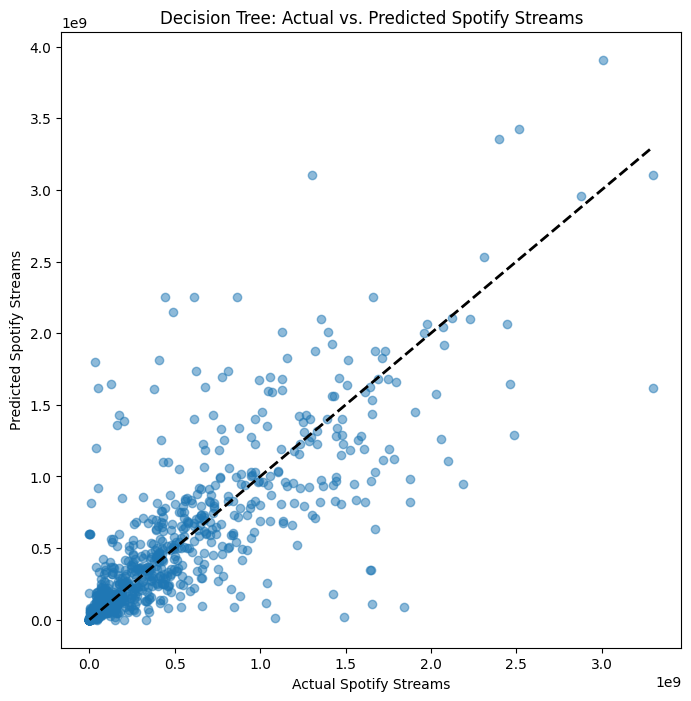

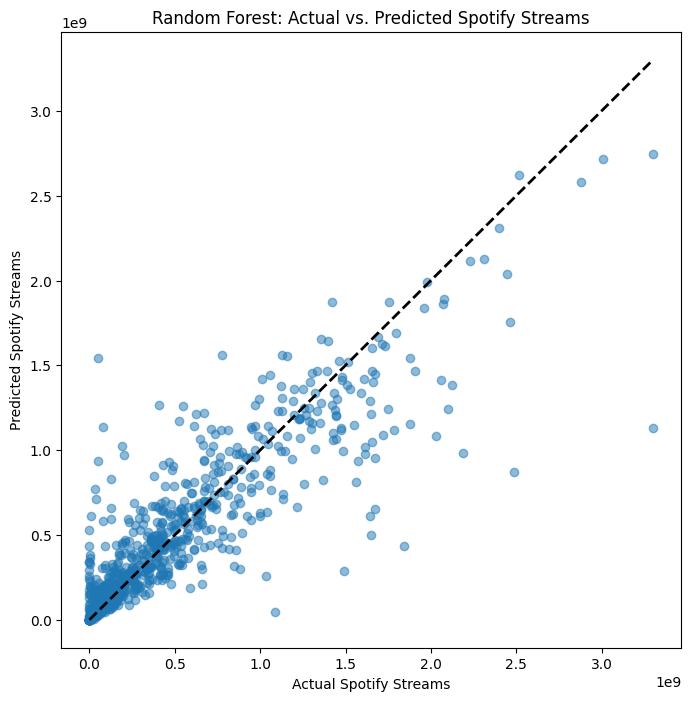

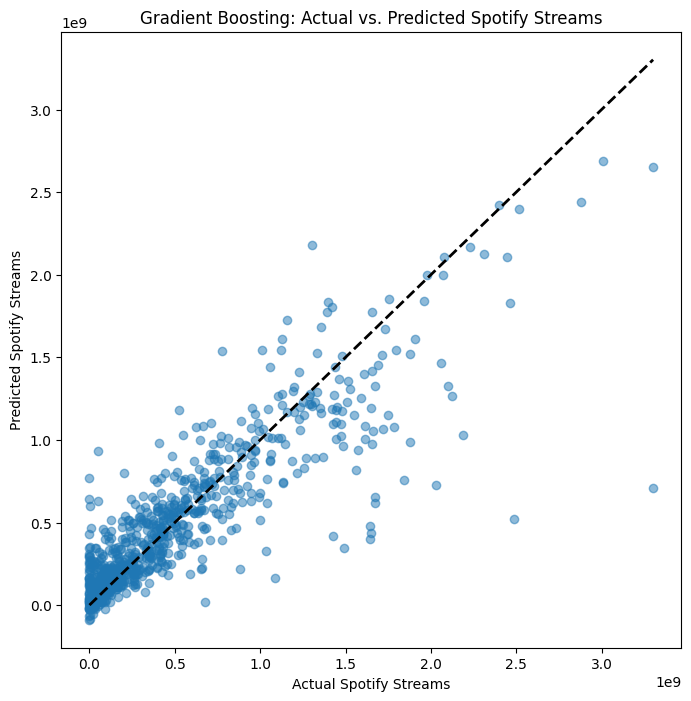

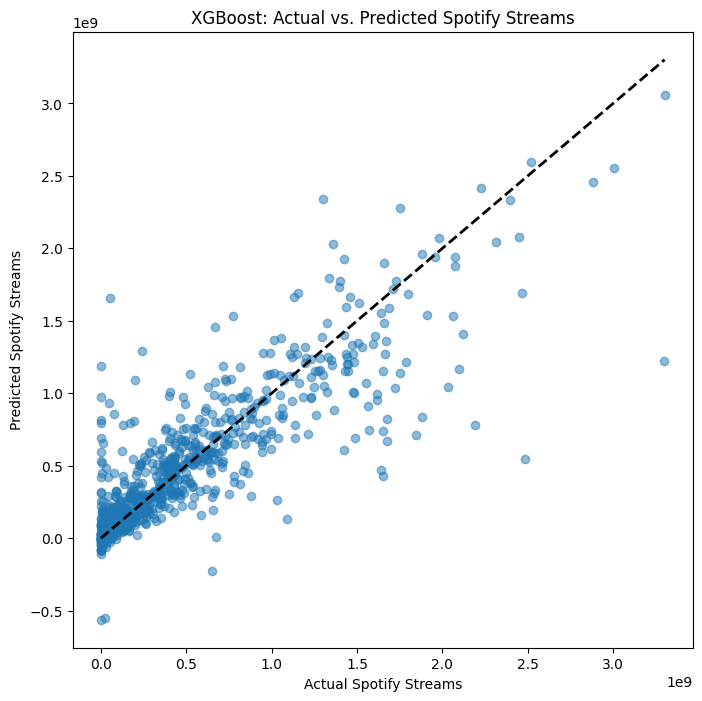

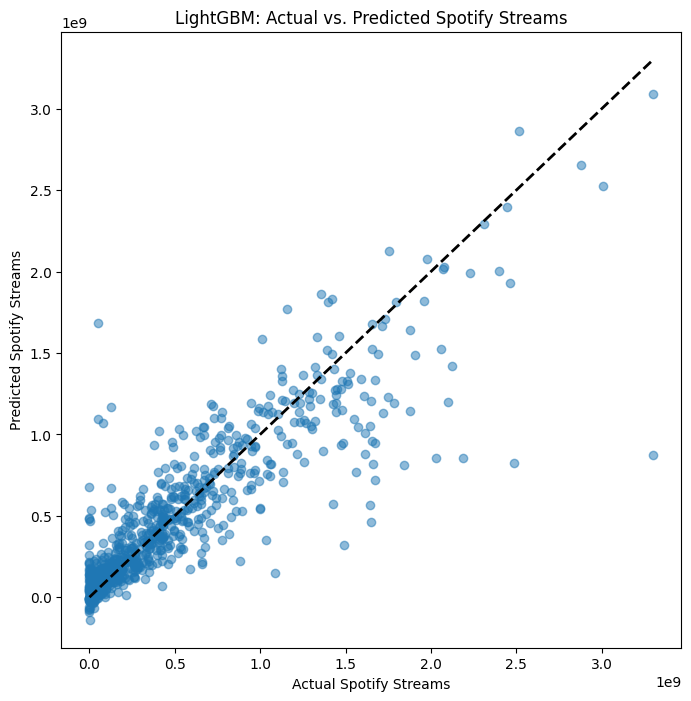

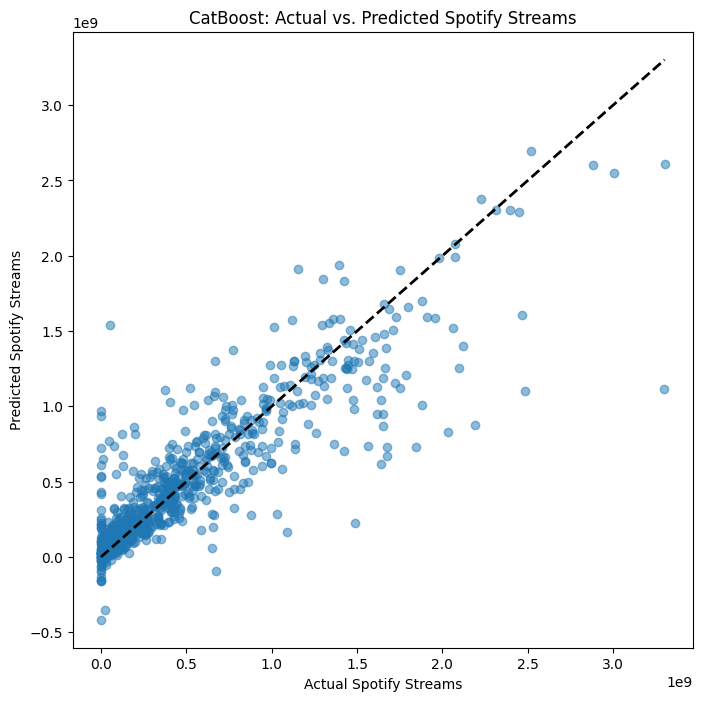

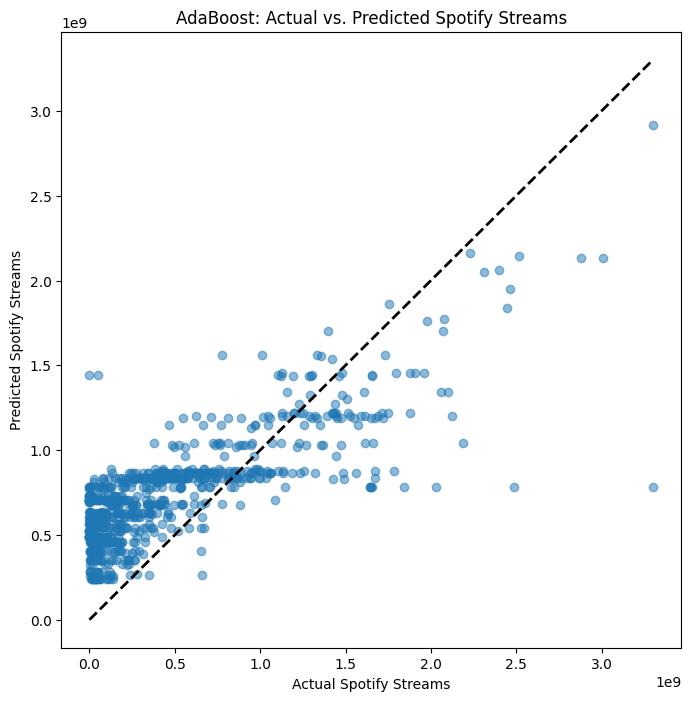

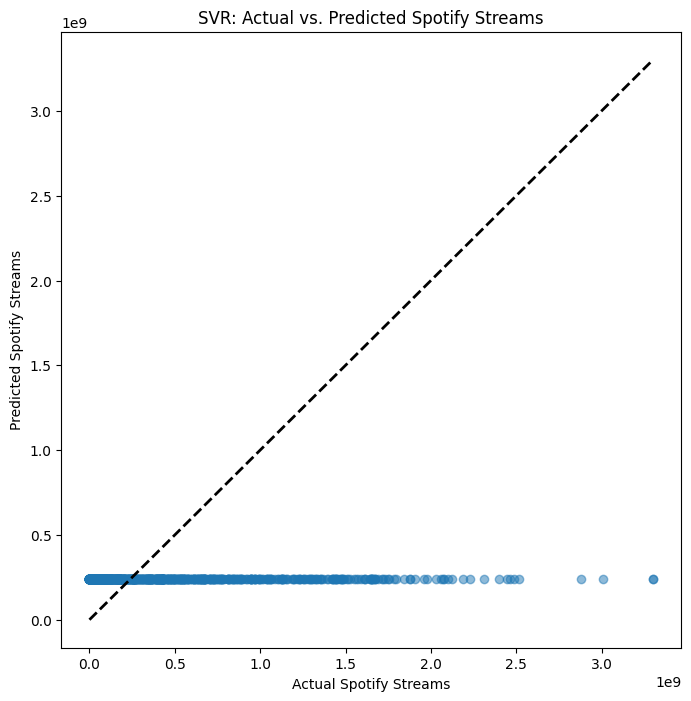

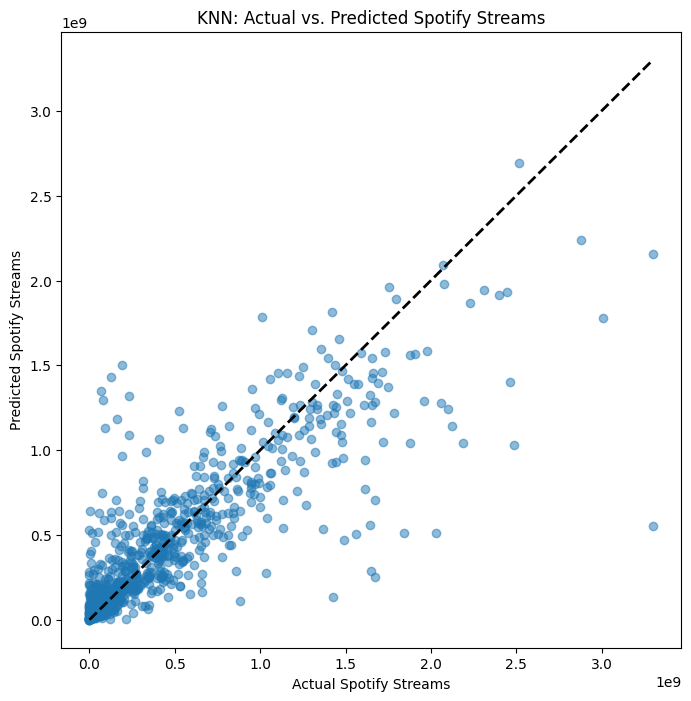

In [121]:
# Iterate through the results dictionary to create scatter plots
for name, model_info in results.items():
    y_pred = model_info['y_pred']

    plt.figure(figsize=(8, 8))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line
    plt.xlabel('Actual Spotify Streams')
    plt.ylabel('Predicted Spotify Streams')
    plt.title(f'{name}: Actual vs. Predicted Spotify Streams')
    plt.show()

## Summary:

### Data Analysis Key Findings

*   Scatter plots were generated for each trained regression model, visualizing the relationship between actual and predicted Spotify stream counts.
*   Each scatter plot included a diagonal line to represent perfect predictions, aiding in the visual assessment of each model's performance.

### Insights or Next Steps

*   Visually inspect the generated plots to identify models where the predicted values cluster closely around the diagonal line, indicating better performance.
*   These visualizations can complement numerical evaluation metrics (like R-squared or Mean Squared Error) to provide a more comprehensive understanding of each model's predictive capabilities.
